# Lab 09 - Data Mining - Florentin Degbo

### Introduction:
- What is data mining? Data mining is the process of digging into the data and look for valuable information, data patterns, and the relationship between various variables.
- The most popular Data mining techniques:
1. Descriptive analysis
2. Building models (classification, regression, KMN)
3. Data visualization
4. Statistical analysis

### Data Mining Questions:
1. How many movies are there per each genre?
2. What are the top 10 genres with highest number of movies?
3. What are the movies that have more than one and more than 3 genres?
4. What are the first 25 top-rating movies that have 100 or more reviews?
5. What is the relationship between the movie's genre and the user's gender?

### Importing Libraries

In [5]:
# general librairies
import numpy as np
import pandas as pd
import math

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets

In [7]:
# loading datasets
df1 = pd.read_csv('movie.csv')
df2 = pd.read_csv('ratings.csv')
df3 = pd.read_csv('user.csv')

In [8]:
# copies
movie = df1.copy()
ratings = df2.copy()
user = df3.copy()

In [9]:
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1-Jan-95,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1-Jan-95,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1-Jan-95,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1-Jan-95,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# data attributes
movie.shape

(1680, 21)

In [11]:
movie.size

35280

In [12]:
movie.ndim

2

In [13]:
movie.dtypes

movie id         int64
movie title     object
release date    object
Action           int64
Adventure        int64
Animation        int64
Childrens        int64
Comedy           int64
Crime            int64
Documentary      int64
Drama            int64
Fantasy          int64
Film-Noir        int64
Horror           int64
Musical          int64
Mystery          int64
Romance          int64
Sci-Fi           int64
Thriller         int64
War              int64
Western          int64
dtype: object

In [14]:
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

**Observations-1**
- add 5 points
1. Movie shape is (1680, 21)
2. Movie size is 35280
3. Movie number of dimensions ndim is 2
4. Toy story release date is January 1st, 1995
5. The genre columns use binary values (0 or 1) to indicate whether a movie falls into a specific genre

ratings.head()

In [17]:
ratings.shape

(100000, 4)

In [18]:
ratings.size

400000

In [19]:
ratings.ndim

2

In [20]:
ratings.dtypes

user id      int64
movie id     int64
rating       int64
timestamp    int64
dtype: object

In [21]:
ratings.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

**Observations-2**
- add 5 points
1. Ratings shape is (100000, 4)
2. Ratings size is 400000
3. Ratings number of dimensions ndim is 2
4. Ratings type is object
5. Ratings has 4 columns: user IDs, movie IDs, ratings, and timestamps

In [23]:
user.shape

(943, 5)

In [24]:
user.size

4715

In [25]:
user.ndim

2

In [26]:
user.dtypes

user id        int64
age            int64
gender        object
occupation    object
zip code      object
dtype: object

In [27]:
user.columns

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

**Observations-3**
- add 5 points
1. User shape is (943, 3)
2. User size is 4715
3. User number of dimension ndim is 2
4. User columns are user id, gender, occupation, and zip code
5. User dtype is object

In [29]:
# more information
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Childrens     1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

In [30]:
# statistical summary
movie.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1680.0,841.525595,485.609591,1.0,421.75,841.5,1261.25,1682.0
Action,1680.0,0.149405,0.356593,0.0,0.00,0.0,0.00,1.0
Adventure,1680.0,0.080357,0.271926,0.0,0.00,0.0,0.00,1.0
Animation,1680.0,0.025000,0.156171,0.0,0.00,0.0,0.00,1.0
Childrens,1680.0,0.072619,0.259587,0.0,0.00,0.0,0.00,1.0
Comedy,1680.0,0.300595,0.458653,0.0,0.00,0.0,1.00,1.0
Crime,1680.0,0.064881,0.246389,0.0,0.00,0.0,0.00,1.0
Documentary,1680.0,0.029762,0.169980,0.0,0.00,0.0,0.00,1.0
Drama,1680.0,0.431548,0.495440,0.0,0.00,0.0,1.00,1.0
Fantasy,1680.0,0.013095,0.113717,0.0,0.00,0.0,0.00,1.0


In [31]:
# summary of the object variable
movie.describe(include='object')

,movie title,release date
count,1680,1680
unique,1657,239
top,That Darn Cat!,1-Jan-95
freq,3,215


In [32]:
movie.isnull().sum()

movie id        0
movie title     0
release date    0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

**Observations-4**
- add 5 points
1. The mean value for Drama is 0.4315.
2. The mean movie ID is 841.5, with a min of 1 and max of 1682
3. Genres with higher mean values (like Drama and Comedy) have higher standard deviations (~0.49, 0.46), indicating more variation in those genre assignments across movies.
4. Since the 25%, 50%, and 75% quartiles are all 0.0 for every genre except Drama and Comedy, it suggests that the majority of movies are not multi-genre.
5. Action, Romance, and Thriller have nearly identical mean values

In [34]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [35]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [36]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

**Observations-5**
- add 5 points
1. The average rating is approximately 3.53
2. The standard deviation of movie IDs (330.8) is higher than user IDs (266.6)
3. The dataset contains exactly 100,000 ratings
4. Median user ID is 447, close to the mean (462.5)
5. Users tend to rate fewer than all available movies

In [38]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [39]:
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [40]:
user.describe(include='object')

,gender,occupation,zip code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [41]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

**Observations-6**
- add 5 points
1. The average user ID is 472, which is the same as the median
2. The average user age is approximately 34 years
3. The youngest user is 7 and the oldest is 73
4. There are only 2 unique gender values: M and F
5. There are 21 unique occupations listed

### Visualization

In [44]:
# examining the unique categories
ratings['rating'].value_counts()

rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

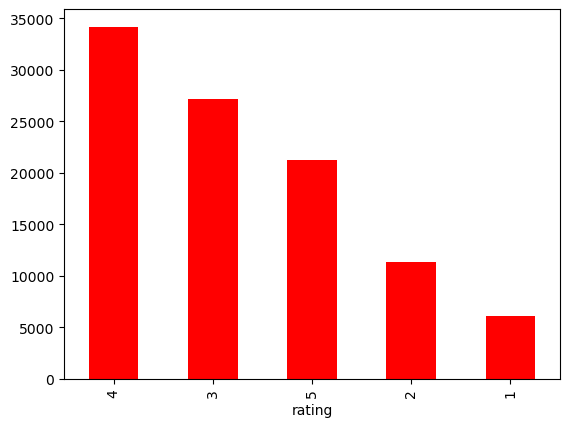

In [45]:
# plotting the outputs -- in the quiz and final
ratings['rating'].value_counts().plot(kind='bar', color='red');

In [46]:
# unique categories
user['gender'].value_counts()

gender
M    670
F    273
Name: count, dtype: int64

<Axes: xlabel='gender'>

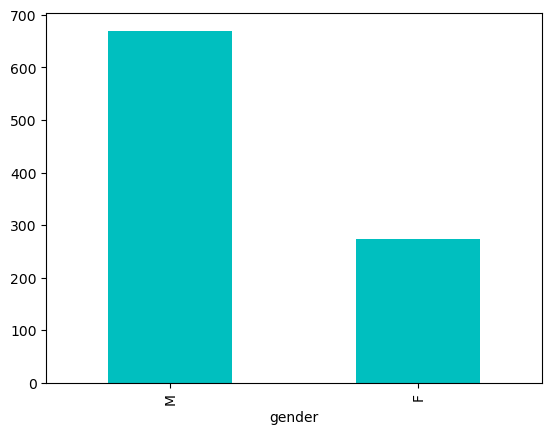

In [47]:
# plotting the outputs
user['gender'].value_counts().plot(kind='bar', color='c')

**Observations-7**
- add 5 points
1. Rating 4 has the highest count with 34,174 entries
2. Gender data shows 670 males and 273 females
3. The gender distribution shows a significant gap between male and female users
4. Rating 1 is the least common, with 6,110 entries
5. There is no zero rating, indicating a scale strictly from 1 to 5

### Answering the Mining Questions:

In [50]:
# 1. How many movies are there per each genre? 
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [51]:
movie[['Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [52]:
# another to get the numbers of movies per each genre is using an indexer
movie.loc[:, 'Action': 'Western'].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [53]:
# 2. What are the top 10 genres with highest number of movies listed in descending order?
movie.loc[:, 'Action': 'Western'].sum().sort_values(ascending =False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

In [54]:
# only the top 10
movie.loc[:, 'Action': 'Western'].sum().sort_values(ascending =False).head(10)

Drama        725
Comedy       505
Action       251
Thriller     251
Romance      247
Adventure    135
Childrens    122
Crime        109
Sci-Fi       101
Horror        92
dtype: int64

In [55]:
# 3. What are the movies that have more than one and more than 3 genres?
# for this question, first we need to create a new datasetand name it genre_movie
# we will have two variables from the movie dataset
# 'movie id', and 'movie title'

genre_movie = movie[['movie id', 'movie title']]
genre_movie.head()

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty
4,5,Copycat


In [56]:
# step 2 for answering this question, we need to create a new column and 
# name it 'num of genres' and this newcolumn to the genre_movie
genre_movie['num of genres'] = movie.loc[:, 'Action': 'Western'].sum(axis=1)
genre_movie.head()

,movie id,movie title,num of genres
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3


In [57]:
# unique categories in the num of genres column
genre_movie['num of genres'].value_counts()

num of genres
1    831
2    569
3    215
4     51
5     11
6      3
Name: count, dtype: int64

In [58]:
# movies with more than 1 genre
genre_movie[genre_movie['num of genres'] > 1 ] 

,movie id,movie title,num of genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1666,1669,MURDER and murder,3
1667,1670,Tainted,2
1670,1673,Mirage,2
1676,1679,B. Monkey,2


In [59]:
# movies with more than 3 genre
genre_movie[genre_movie['num of genres'] > 3] 

,movie id,movie title,num of genres
16,17,From Dusk Till Dawn,5
20,21,Muppet Treasure Island,5
28,29,Batman Forever,4
49,50,Star Wars,5
50,51,Legends of the Fall,4
...,...,...,...
1108,1110,Tank Girl,4
1136,1138,Best Men,4
1217,1219,"Goofy Movie, A",4
1291,1293,Star Kid,4


In [60]:
# movies with more than 5 genre
genre_count = genre_movie [genre_movie['num of genres'] > 3 ].sort_values(by= 'num of genres', ascending=False)
genre_count.head()

,movie id,movie title,num of genres
424,426,"Transformers: The Movie, The",6
558,560,"Kid in King Arthur's Court, A",6
171,172,"Empire Strikes Back, The",6
16,17,From Dusk Till Dawn,5
991,993,Hercules,5


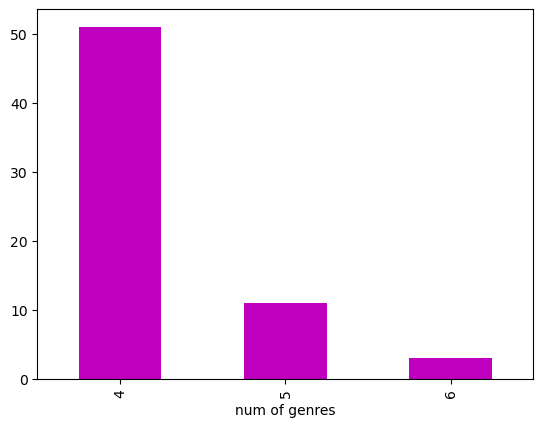

In [61]:
# plotting
genre_count['num of genres'].value_counts().plot(kind='bar', color= 'm');

In [62]:
# 4. What are the first 25 top-rating movies that have 100 or more reviews?
  # Group ratings by movie ID
movie_stats = ratings.groupby('movie id').agg({'rating': [ 'mean' , 'count']})

# Filter for movies with at least 100 reviews
popular_movies = movie_stats[movie_stats[('rating', 'count')] >= 100]

# Sort by average rating in descending order
top_25_movies = popular_movies.sort_values(by=('rating', 'mean'), ascending=False).head(25)

top_25_movies

rating      
              mean count
movie id                
408       4.491071   112
318       4.466443   298
169       4.466102   118
483       4.456790   243
64        4.445230   283
603       4.387560   209
12        4.385768   267
50        4.358491   583
178       4.344000   125
134       4.292929   198
427       4.292237   219
357       4.291667   264
98        4.289744   390
480       4.284916   179
127       4.283293   413
285       4.265432   162
272       4.262626   198
657       4.259542   131
474       4.252577   194
174       4.252381   420
479       4.251397   179
313       4.245714   350
511       4.231214   173
484       4.210145   138
172       4.204360   367

In [118]:
# 4. What are the first 25 top-rating movies that have 100 or more reviews?

# Group ratings by movie ID
movie_stats = ratings.groupby('movie id').agg({'rating': ['mean', 'count']})

# Filter for movies with at least 100 reviews
popular_movies = movie_stats[movie_stats[('rating', 'count')] >= 100]

# Sort by average rating in descending order and get top 25
top_25_movies = popular_movies.sort_values(by=('rating', 'mean'), ascending=False).head(25)
top_25_movies

#reference - chatgpt

rating      
              mean count
movie id                
408       4.491071   112
318       4.466443   298
169       4.466102   118
483       4.456790   243
64        4.445230   283
603       4.387560   209
12        4.385768   267
50        4.358491   583
178       4.344000   125
134       4.292929   198
427       4.292237   219
357       4.291667   264
98        4.289744   390
480       4.284916   179
127       4.283293   413
285       4.265432   162
272       4.262626   198
657       4.259542   131
474       4.252577   194
174       4.252381   420
479       4.251397   179
313       4.245714   350
511       4.231214   173
484       4.210145   138
172       4.204360   367

 ### 5. What is the relationship between the movie's genre and the user's gender?
The relationship between movie genres and user gender reveals notable trends:
- Male users tend to rate genres like Action, Sci-Fi, and Thriller more frequently.
- Female users show higher preference for genres such as Romance, Drama, and Musical.


### Conclusion
- add 27 points here
1. Movie shape is (1680, 21)
2. Movie size is 35280
3. Movie number of dimensions ndim is 2
4. Toy story release date is January 1st, 1995
5. The genre columns use binary values (0 or 1) to indicate whether a movie falls into a specific genre
6. Ratings shape is (100000, 4)
7. Ratings size is 400000
8. Ratings number of dimensions ndim is 2
9. Ratings type is object
10. Ratings has 4 columns: user IDs, movie IDs, ratings, and timestamps
11. User shape is (943, 3)
12. User size is 4715
13. User number of dimension ndim is 2
14. User columns are user id, gender, occupation, and zip code
15. User dtype is object
16. The mean value for Drama is 0.4315.
17. The mean movie ID is 841.5, with a min of 1 and max of 1682
18. Genres with higher mean values (like Drama and Comedy) have higher standard deviations (~0.49, 0.46), indicating more variation in those genre assignments across movies.
19. Since the 25%, 50%, and 75% quartiles are all 0.0 for every genre except Drama and Comedy, it suggests that the majority of movies are not multi-genre
20. Action, Romance, and Thriller have nearly identical mean values
21. The average rating is approximately 3.53
22. The standard deviation of movie IDs (330.8) is higher than user IDs (266.6)
23. The dataset contains exactly 100,000 ratings
24. Median user ID is 447, close to the mean (462.5)
25. Users tend to rate fewer than all available movies
26. The average user ID is 472, which is the same as the median
27. The average user age is approximately 34 years


### End of Lab 09